# Automatisierte Messung

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.constants as const

Anode als Referenz:

In [61]:
label = [30,40,50,60,70]
anode = {}
for i in label:
    anode[i] = np.loadtxt('data/strom_an/' + str(i) + 'mu.txt', skiprows=3).T

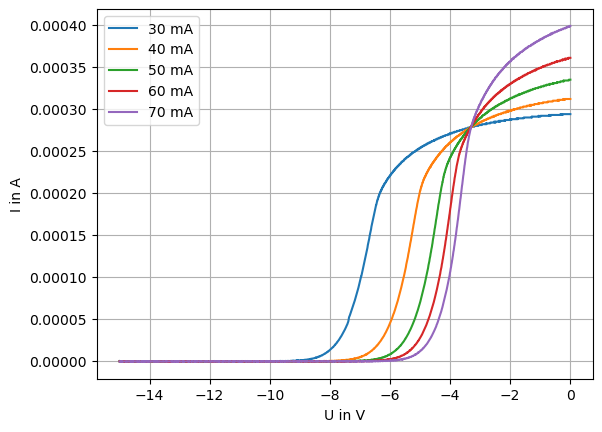

In [62]:
ax = plt.subplots()
for i in label:
    plt.plot(anode[i][0],anode[i][1],label=str(i)+' mA')
plt.xlabel('U in V')
plt.ylabel('I in A')
plt.grid()
plt.legend()

In [83]:
def slope_to_Te1(slope):
    return const.e/const.k/slope
def slope_to_Te2(slope):
    return 0.5*const.e/const.k/slope

Bestimmung der Elektronentemperatur:

4935.797764982745
20888.354152566575


C:\Users\ebel1\AppData\Local\Temp\ipykernel_6392\1303799868.py:3: RuntimeWarning: invalid value encountered in log
  I = np.log(anode[i][1])


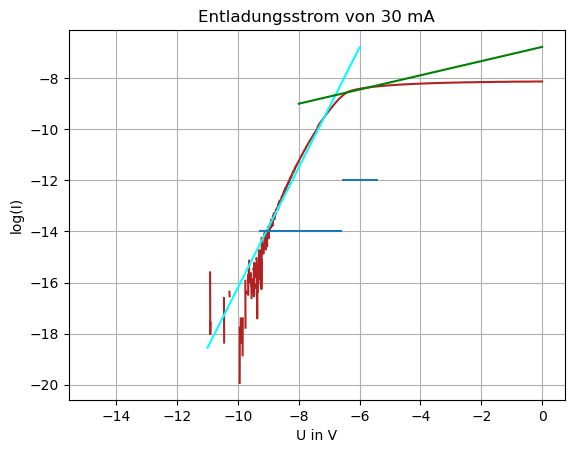

In [97]:
i = 30
U = anode[i][0]
I = np.log(anode[i][1])
ax = plt.subplots()
plt.plot(U,I,color='firebrick')
plt.xlabel('U in V')
plt.ylabel('log(I)')
plt.grid()
plt.title('Entladungsstrom von '+str(i)+' mA')

# Wie genau Bereiche wählen???
v1,v2 = 1400,1600
u1,u2 = 950,1400

def lin_func(m,b,x):
    return m*x+b
m1, b1, r1, p1, se1 = linregress(U[u1:u2],I[u1:u2])
lin = np.linspace(-11.0,-6.0,1000)
plt.plot(lin,lin_func(m1,b1,lin),color='cyan')

Te1 = slope_to_Te1(m1)
print(Te1)

m2, b2, r2, p2, se2 = linregress(U[v1:v2],I[v1:v2])
lin = np.linspace(-8.0,0.0,1000)
plt.plot(lin,lin_func(m2,b2,lin),color='green')

Te2 = slope_to_Te2(m2)
print(Te2)

plt.hlines(-12.0,U[v1],U[v2])
plt.hlines(-14,U[u1],U[u2])

Kathode als Referenz:

In [64]:
label = [30,40,50,60,70]
kathode = {}
for i in label:
    kathode[i] = np.loadtxt('data/strom_kat/' + str(i) + 'mu_kat.txt', skiprows=3).T

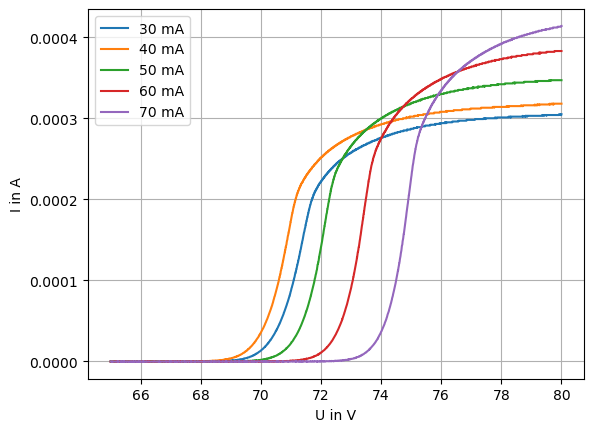

In [65]:
ax = plt.subplots()
for i in label:
    plt.plot(kathode[i][0],kathode[i][1],label=str(i)+' mA')
plt.xlabel('U in V')
plt.ylabel('I in A')
plt.grid()
plt.legend()

Bestimmung der Elektronentemperatur:

C:\Users\ebel1\AppData\Local\Temp\ipykernel_6392\1305173374.py:3: RuntimeWarning: invalid value encountered in log
  I = np.log(kathode[i][1])


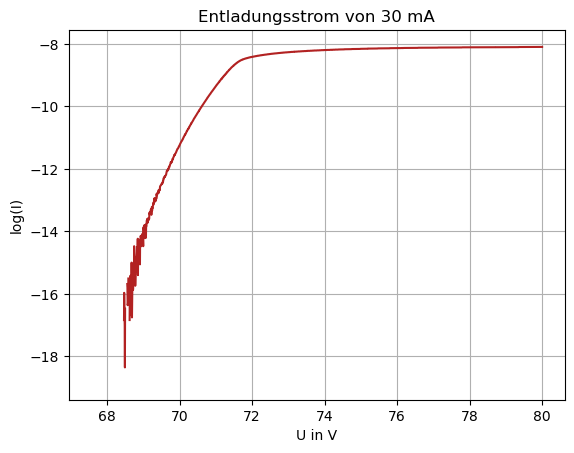

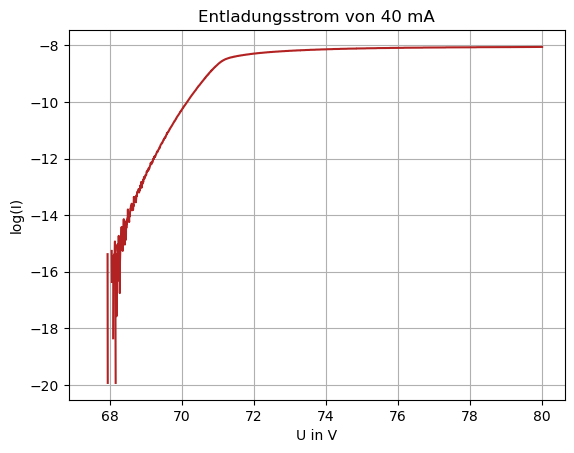

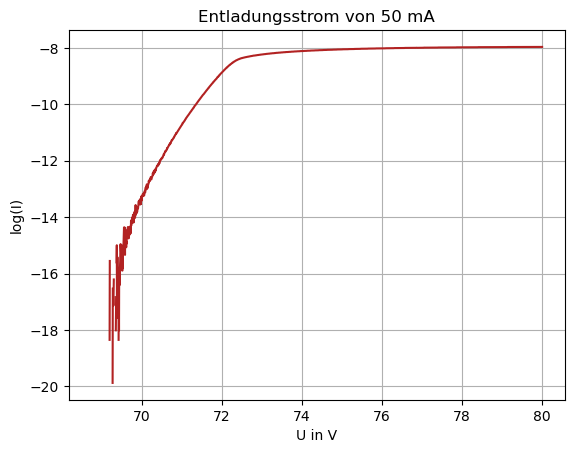

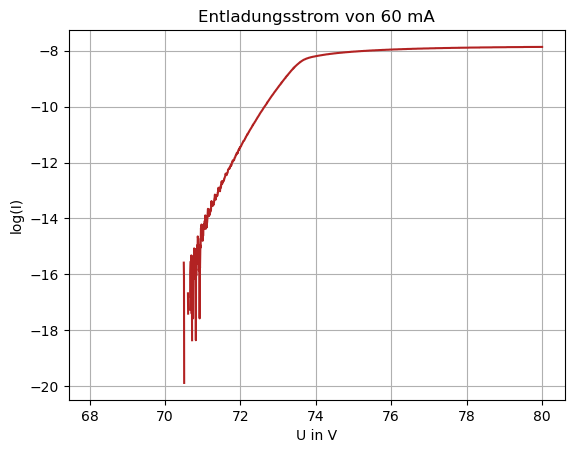

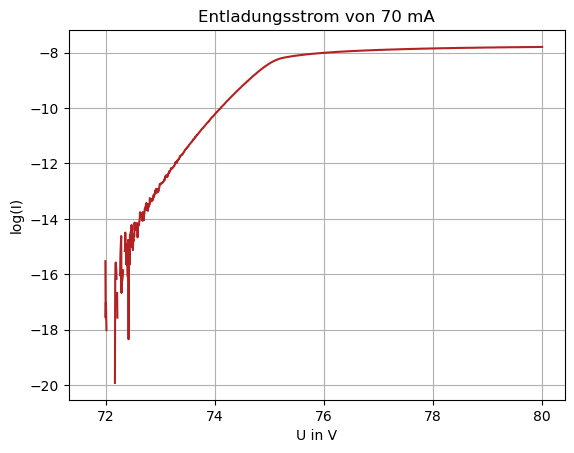

In [66]:
for i in label:
    U = kathode[i][0]
    I = np.log(kathode[i][1])
    ax = plt.subplots()
    plt.plot(U,I,color='firebrick')
    plt.xlabel('U in V')
    plt.ylabel('log(I)')
    plt.grid()
    plt.title('Entladungsstrom von '+str(i)+' mA')